In [5]:
# When comparing two data sets using statistical tools, it is not
# sufficient to simply compare their average or median values. This is because
# such results can be skewed by randomness. For example, suppose we are
# calculating the median values of ten seeds. If one algorithm gets "lucky"
# and happens to use more above-average seeds, the estimated median will
# be skewed. Therefore, it is necessary to check the statistical significance of
# results. This is exactly what the indifferent entries are displaying. To determine
# statistical significance, the Kruskal-Wallis and Mann-Whitney U tests with 95% confidence
# intervals can be used.

# The Kruskal-Wallis H-test tests the null hypothesis that the population median of all
# of the groups are equal. It is a non-parametric version of ANOVA.
# The test works on 2 or more independent samples, which may have different sizes.
# Note that rejecting the null hypothesis does not indicate which of the groups differs.
# Post hoc comparisons between groups are required to determine which groups are different.

In [6]:
import numpy as np
from scipy import stats
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]
sys.path.append("..")
import rbf_functions

In [7]:
rbfs = [
    rbf_functions.original_rbf,
    rbf_functions.squared_exponential_rbf,
    rbf_functions.inverse_quadratic_rbf,
    rbf_functions.inverse_multiquadric_rbf,
    rbf_functions.exponential_rbf,
    rbf_functions.matern32_rbf,
    rbf_functions.matern52_rbf,
]

# Kruskal-Wallis HV local reference set

In [13]:
refsets = {}
for entry in rbfs:
    rbf = entry.__name__
    df_hv_data = pd.read_csv(f"refsets/{rbf}_refset.csv")
    refsets[rbf] = df_hv_data
# df_hv = pd.DataFrame.from_dict(hvdata, orient="index")
# hvdata

In [19]:
objectives = refsets['original_rbf'].columns.values.tolist()

In [109]:
import itertools
import collections

combinations = itertools.combinations([rbf.__name__ for rbf in rbfs], 2)

results = pd.DataFrame(index=index, columns=[rbf.__name__ for rbf in rbfs])
for rbf_i, rbf_j in combinations:
    teststatistics = {}
    for obj in objectives:
        data_i_obj = refsets[rbf_i][obj]
        data_j_obj = refsets[rbf_j][obj]
        krusval, pval = stats.kruskal(data_i_obj, data_j_obj)
        results.loc[(rbf_i, obj), (rbf_j)]= pval 

    
results= results.fillna(0)

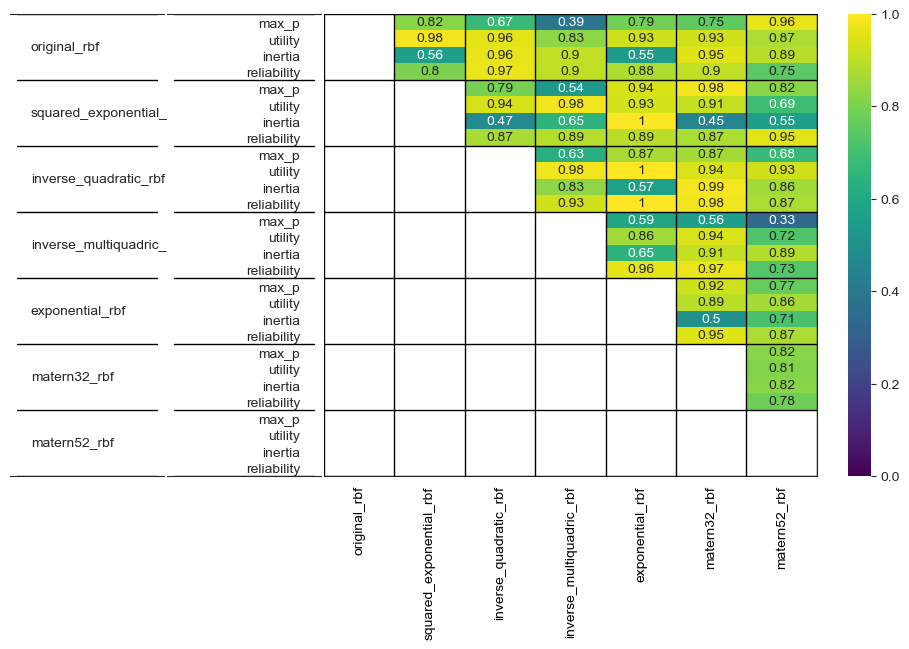

In [235]:
import matplotlib as mpl

gs = mpl.gridspec.GridSpec(
    1, 3, wspace=0.01, hspace=0.01, width_ratios=[1, 1, 4]
)

sns.set_style('white')

fig = plt.figure(figsize=(12,6))

ax1 =  fig.add_subplot(gs[0, 0])
ax2 =  fig.add_subplot(gs[0, 1])
ax3 =  fig.add_subplot(gs[0, 2])

ax1.set_ylim(ymin=0, ymax=28)
ax2.set_ylim(ymin=0, ymax=28)

for ax in [ax1, ax2]:
    for spine in ['left', 'right']:
        ax.spines[spine].set_color("white")
    ax.set_xticks([])
    ax.set_yticks([])


# y labels rbfs
for i, rbf in enumerate([rbf.__name__ for rbf in rbfs[::-1]]):
    ax1.text(0.1, (i*4)+2, rbf, va='center')

    # y labels outcomes
    for j, obj in enumerate(objectives[::-1]):
        ax2.text(0.9, (i*4)+(j), obj, va='bottom', ha='right')
    
    
sns.heatmap(results, annot=True, cmap='viridis', ax=ax3, mask=(results==0), vmin=0)

for i in range(0, 4*(len(rbfs)+1), 4):
    ax3.plot([0, 7], [i, i], lw=1, color="black")
    ax1.plot([0, 1], [i, i], lw=1, color="black")        
    ax2.plot([0, 1], [i, i], lw=1, color="black")            
    
for i in range(0, (len(rbfs)+1)):
    

    ax3.plot([i, i], [0, 28], lw=1, color="black")    

ax3.tick_params(axis='x', colors='black')

ax3.spines['bottom'].set_visible(True)
ax3.spines['right'].set_visible(True)
ax3.set_yticks([])
ax3.set_ylabel('')




plt.show()

In [209]:
ax1.get_ylim()

(0.0, 28.0)

In [154]:
mpl.gridspec.GridSpec?

Init signature:
mpl.gridspec.GridSpec(
    nrows,
    ncols,
    figure=None,
    left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=None,
    hspace=None,
    width_ratios=None,
    height_ratios=None,
)
Docstring:     
A grid layout to place subplots within a figure.

The location of the grid cells is determined in a similar way to
`~.figure.SubplotParams` using *left*, *right*, *top*, *bottom*, *wspace*
and *hspace*.

Indexing a GridSpec instance returns a `.SubplotSpec`.
Init docstring:
Parameters
----------
nrows, ncols : int
    The number of rows and columns of the grid.

figure : `.Figure`, optional
    Only used for constrained layout to create a proper layoutgrid.

left, right, top, bottom : float, optional
    Extent of the subplots as a fraction of figure width or height.
    Left cannot be larger than right, and bottom cannot be larger than
    top. If not given, the values will be inferred from a figure or
    rcParams at draw time. See also `GridSpec.ge